# Importance Sampling

$$\begin{aligned}
    \text{Let} \quad & \\
    \pi &= Q(P) \cdot (P - C - L) \\
    \text{where} \quad& \\
    \pi &\text{ is the total profits} \\
    Q(P) &\text{ is the \$ disbursal, which depends on price } P \\
    P &\text{ is the \$ cost of the loan} \\
    C &\text{ is the Cost of Funds (COF)} \\
    L &\text{ is the LI} \\
\end{aligned}$$

In [363]:
import numpy as np 
import matplotlib.pyplot as plt

a = 10
b = -1.2
price_range = np.linspace(0, 10, 100)

def demand_curve(price, a, b):
    return a * price ** b

def profit_function1(price):
    disbursal=demand_curve(price,a,b)
    cof=0.02
    li=0.02
    return disbursal * (price - cof - li)

def profit_function2(price):
    disbursal=demand_curve(price,a,b)
    cof=0.05
    li=0.05
    return disbursal * (price - cof - li)

def profit_function3(price):
    disbursal=demand_curve(price,a,b)
    cof=0.1
    li=0.1
    return disbursal * (price - cof - li)

/var/folders/hs/wbbxdff91wj8m8np2cv6jnnw0000gq/T/ipykernel_68818/178728541.py:9: RuntimeWarning: divide by zero encountered in scalar power
  return a * price ** b


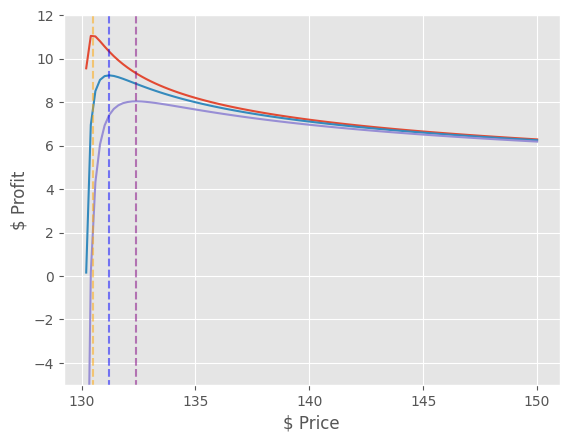

In [381]:
disbursal = [demand_curve(price, a, b) for price in price_range]
profits1 = [profit_function1(price=p) for p in price_range]
profits2 = [profit_function2(price=p) for p in price_range]
profits3 = [profit_function3(price=p) for p in price_range]
plt.style.use('ggplot')

# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.plot(disbursal,price_range)
# plt.subplot(1,2,2)
plt.plot(price_range, profits1)
plt.plot(price_range, profits2)
plt.plot(price_range, profits3)
plt.ylim(-5, 12)

from scipy.optimize import minimize_scalar
negated_profit_function1 = lambda p: -1 * profit_function1(p)
negated_profit_function2 = lambda p: -1 * profit_function2(p)
negated_profit_function3 = lambda p: -1 * profit_function3(p)

result1 = minimize_scalar(negated_profit_function1, bounds=(0, 10), method='bounded')
result2 = minimize_scalar(negated_profit_function2, bounds=(0, 10), method='bounded')
result3 = minimize_scalar(negated_profit_function3, bounds=(0, 10), method='bounded')

plt.vlines(x=result1.x, ymin=-100, ymax=100, linestyle='--', color='orange', alpha=0.5)
plt.vlines(x=result2.x, ymin=-100, ymax=100, linestyle='--', color='blue', alpha=0.5)
plt.vlines(x=result3.x, ymin=-100, ymax=100, linestyle='--', color='purple', alpha=0.5)
plt.xlabel('$ Price')
plt.ylabel('$ Profit')
plt.xticks(ticks=np.linspace(0,10,5), labels=[130, 135, 140, 145, 150]);

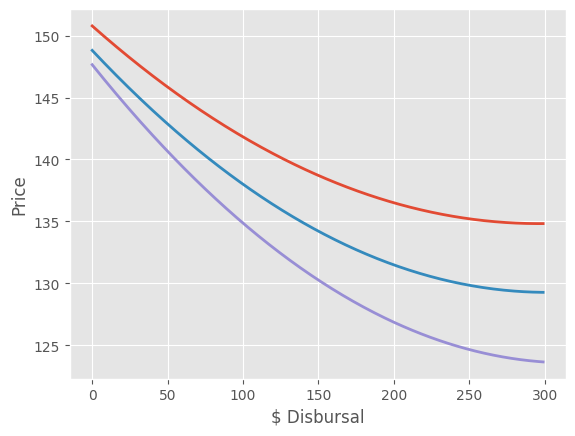

In [13]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

obs=300
xvals = np.array(range(obs))
yvals1 = 150 - 2 * xvals**0.4 + np.random.normal(0, 3, obs)
yvals2 = 150 - 2.5 * xvals**0.4 + np.random.normal(0, 3, obs)
yvals3 = 150 - 3 * xvals**0.4 + np.random.normal(0, 3, obs)

degree = 2 
model1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model1.fit(xvals.reshape(-1,1), yvals1.reshape(-1,1))
ypred1 = model1.predict(xvals.reshape(-1,1))

model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model2.fit(xvals.reshape(-1,1), yvals2.reshape(-1,1))
ypred2 = model2.predict(xvals.reshape(-1,1))

model3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model3.fit(xvals.reshape(-1,1), yvals3.reshape(-1,1))
ypred3 = model3.predict(xvals.reshape(-1,1))


plt.style.use('ggplot')
# plt.scatter(xvals, yvals, c='orange', s=5.5, alpha=0.5)
plt.plot(xvals, ypred1, linewidth=2)
plt.plot(xvals, ypred2, linewidth=2)
plt.plot(xvals, ypred3, linewidth=2)
plt.xlabel('$ Disbursal')
plt.ylabel('Price')
# plt.ylim(123,148)
plt.yticks(ticks=np.linspace(123,145,6), labels=[125, 130, 135, 140, 145, 150]);

Text(0, 0.5, 'Price')

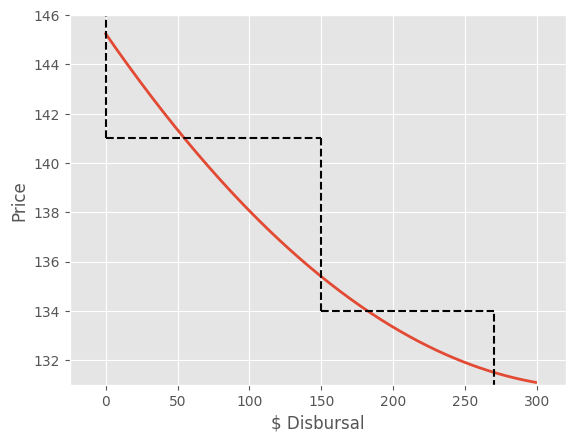

In [355]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline 

obs=300
xvals = np.array(range(obs))
yvals = 150 - 2 * xvals**0.4 + np.random.normal(0, 3, obs)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 2 
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(xvals.reshape(-1,1), yvals.reshape(-1,1))
ypred = model.predict(xvals.reshape(-1,1))

plt.style.use('ggplot')
# plt.scatter(xvals, yvals, c='orange', s=5.5, alpha=0.5)
plt.plot(xvals, ypred, linewidth=2)
plt.vlines(x=0, ymin=141, ymax=150, color='black', linestyle='--')
plt.hlines(y=141, xmin=0, xmax=150, color='black', linestyle='--')
plt.vlines(x=150, ymin=134, ymax=141, color='black', linestyle='--')
plt.hlines(y=134, xmin=150, xmax=270, color='black', linestyle='--')
plt.vlines(x=270, ymin=0, ymax=134, color='black', linestyle='--')


plt.ylim([131, 146])
plt.xlim([-25, 320])
plt.xlabel('$ Disbursal')
plt.ylabel('Price')

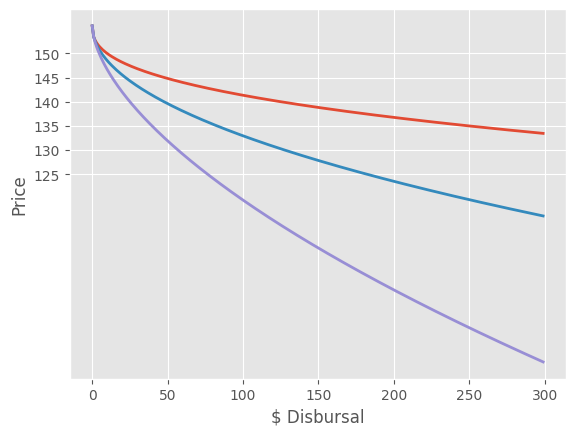

In [18]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

obs=300
xvals = np.array(range(obs))
yvals1 = 150 - 2 * xvals**0.4
yvals2 = 150 - 2 * xvals**0.5
yvals3 = 150 - 2 * xvals**0.6

degree = 2 
model1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model1.fit(xvals.reshape(-1,1), yvals1.reshape(-1,1))
ypred1 = model1.predict(xvals.reshape(-1,1))

model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model2.fit(xvals.reshape(-1,1), yvals2.reshape(-1,1))
ypred2 = model2.predict(xvals.reshape(-1,1))

model3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model3.fit(xvals.reshape(-1,1), yvals3.reshape(-1,1))
ypred3 = model3.predict(xvals.reshape(-1,1))


plt.style.use('ggplot')
# plt.scatter(xvals, yvals, c='orange', s=5.5, alpha=0.5)
plt.plot(xvals, yvals1, linewidth=2)
plt.plot(xvals, yvals2, linewidth=2)
plt.plot(xvals, yvals3, linewidth=2)
plt.xlabel('$ Disbursal')
plt.ylabel('Price')
# plt.ylim(123,148)
plt.yticks(ticks=np.linspace(123,145,6), labels=[125, 130, 135, 140, 145, 150]);

Text(0, 0.5, 'Price')

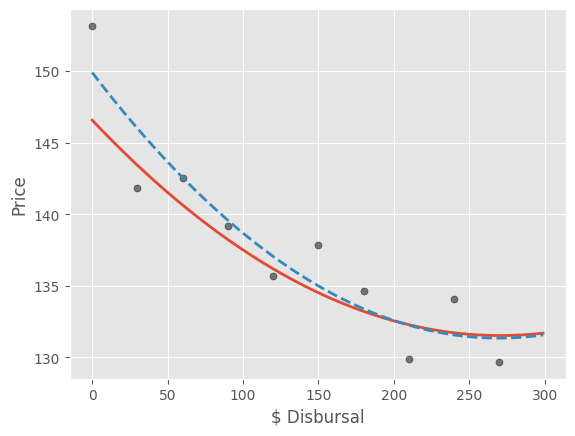

In [41]:
degree = 2 
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(xvals[0:300:30].reshape(-1,1), yvals[0:300:30].reshape(-1,1))
ypred_exp = model.predict(xvals.reshape(-1,1))

plt.scatter(xvals[0:300:30], yvals[0:300:30], c='black', s=25.5, alpha=0.5)
plt.plot(xvals, ypred, linewidth=2)
plt.plot(xvals, ypred_exp, linewidth=2, linestyle='--')
plt.xlabel('$ Disbursal')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

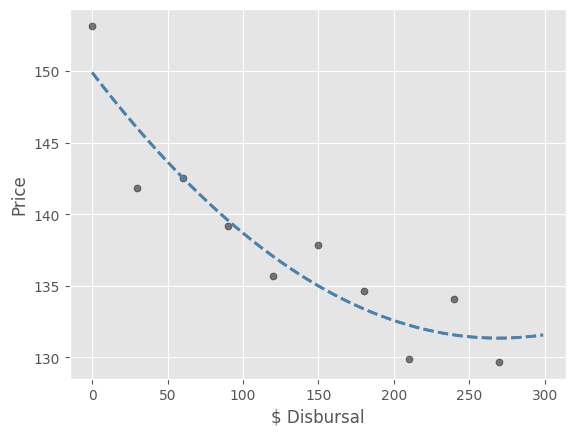

In [44]:
degree = 2 
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(xvals[0:300:30].reshape(-1,1), yvals[0:300:30].reshape(-1,1))
ypred_exp = model.predict(xvals.reshape(-1,1))

plt.scatter(xvals[0:300:30], yvals[0:300:30], c='black', s=25.5, alpha=0.5)
# plt.plot(xvals, ypred, linewidth=2)
plt.plot(xvals, ypred_exp, linewidth=2, linestyle='--')
plt.plot(xvals, ypred_exp, linewidth=2, linestyle='--')
plt.xlabel('$ Disbursal')
plt.ylabel('Price')

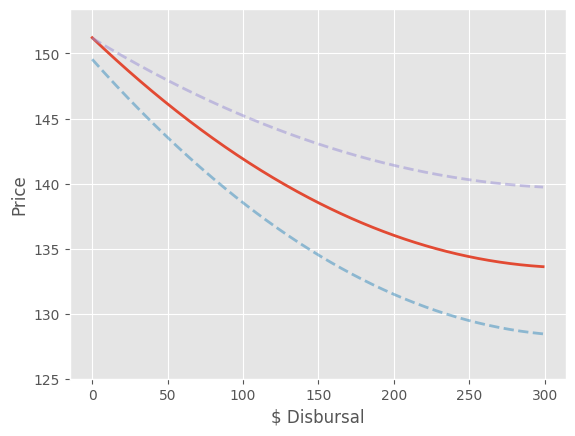

In [258]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

obs=300
xvals = np.array(range(obs))
yvals1 = 150 - 2 * xvals**0.4 + np.random.normal(0, 3, obs)
yvals2 = 150 - 2.5 * xvals**0.4 + np.random.normal(0, 3, obs)
yvals3 = 150 - 1.5 * xvals**0.4 + np.random.normal(0, 3, obs)

degree = 2 
model1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model1.fit(xvals.reshape(-1,1), yvals1.reshape(-1,1))
ypred1 = model1.predict(xvals.reshape(-1,1))

model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model2.fit(xvals.reshape(-1,1), yvals2.reshape(-1,1))
ypred2 = model2.predict(xvals.reshape(-1,1))

model3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model3.fit(xvals.reshape(-1,1), yvals3.reshape(-1,1))
ypred3 = model3.predict(xvals.reshape(-1,1))


plt.style.use('ggplot')
# plt.scatter(xvals, yvals, c='orange', s=5.5, alpha=0.5)
plt.plot(xvals, ypred1, linewidth=2)
plt.plot(xvals, ypred2, linewidth=2, linestyle='--', alpha=0.5)
plt.plot(xvals, ypred3, linewidth=2, linestyle='--', alpha=0.5)
plt.xlabel('$ Disbursal')
plt.ylabel('Price')
plt.ylim(123,148)
plt.yticks(ticks=np.linspace(123,145,6), labels=[125, 130, 135, 140, 145, 150]);